In [40]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.12.0


In [42]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [4]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
X=dataset.iloc[:,3:13]
Y=dataset.iloc[:,13]

In [7]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [8]:
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [9]:
X=X.drop(['Geography','Gender'],axis=1)

In [10]:
pd.concat([X,geography,gender],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc=StandardScaler()

In [15]:
X_sc=sc.fit_transform(X_train)
Y_sc=sc.transform(x_test)

# Part 2 - Now let's make the ANN!

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [17]:
# Initialising the ANN
classifier=Sequential()

In [18]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='ReLU'))

In [19]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=7,activation='ReLU'))

In [20]:
# Adding the input layer and the second hidden layer
classifier.add(Dense(units=6,activation='ReLU'))

In [21]:
# Adding the ouput layer
classifier.add(Dense(units=1,activation='relu'))

In [22]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [43]:
matplotlib.rcParams['figure.figsize'] = (12,9)
model_history=classifier.fit(X_sc,Y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
449/449 [==============================] - 2s 5ms/step - loss: 0.3376 - accuracy: 0.8581 - val_loss: 0.4087 - val_accuracy: 0.8454
Epoch 2/50
449/449 [==============================] - 2s 4ms/step - loss: 0.3391 - accuracy: 0.8590 - val_loss: 0.3958 - val_accuracy: 0.8440
Epoch 3/50
449/449 [==============================] - 2s 4ms/step - loss: 0.3351 - accuracy: 0.8570 - val_loss: 0.3953 - val_accuracy: 0.8436
Epoch 4/50
449/449 [==============================] - 2s 4ms/step - loss: 0.3404 - accuracy: 0.8585 - val_loss: 0.4455 - val_accuracy: 0.8467
Epoch 5/50
449/449 [==============================] - 2s 4ms/step - loss: 0.3415 - accuracy: 0.8565 - val_loss: 0.4266 - val_accuracy: 0.8476
Epoch 6/50
449/449 [==============================] - 2s 5ms/step - loss: 0.3406 - accuracy: 0.8556 - val_loss: 0.4425 - val_accuracy: 0.8440
Epoch 7/50
449/449 [==============================] - 2s 5ms/step - loss: 0.3446 - accuracy: 0.8592 - val_loss: 0.4087 - val_accuracy: 0.8463
Epoch 

In [26]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


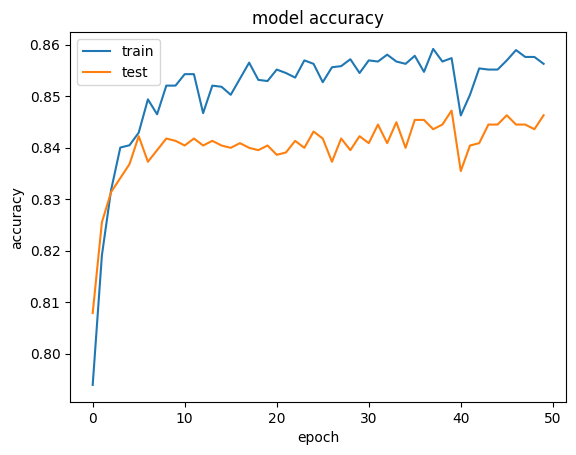

In [28]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('model accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

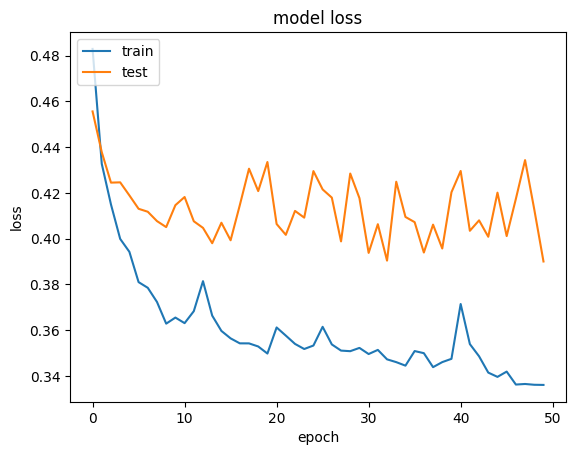

In [29]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('model loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [32]:
y_pred=classifier.predict(Y_sc)
y_pred=(y_pred>0.5)

104/104 [==============================] - 0s 2ms/step


In [38]:
confusion_matrix(y_test,y_pred)

array([[2485,  132],
       [ 344,  339]], dtype=int64)

In [39]:
accuracy_score(y_test,y_pred)

0.8557575757575757